<div style="text-align: center;">
    <h1>
        <a href="https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad" target="_blank">Advertisement - Click on Ad dataset</a>
    </h1>
    <h3>Mohammad Nourbakhsh Marvast</h3>
</div>


# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

# Imports

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score;

#Loading Data

In [2]:
df= pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis

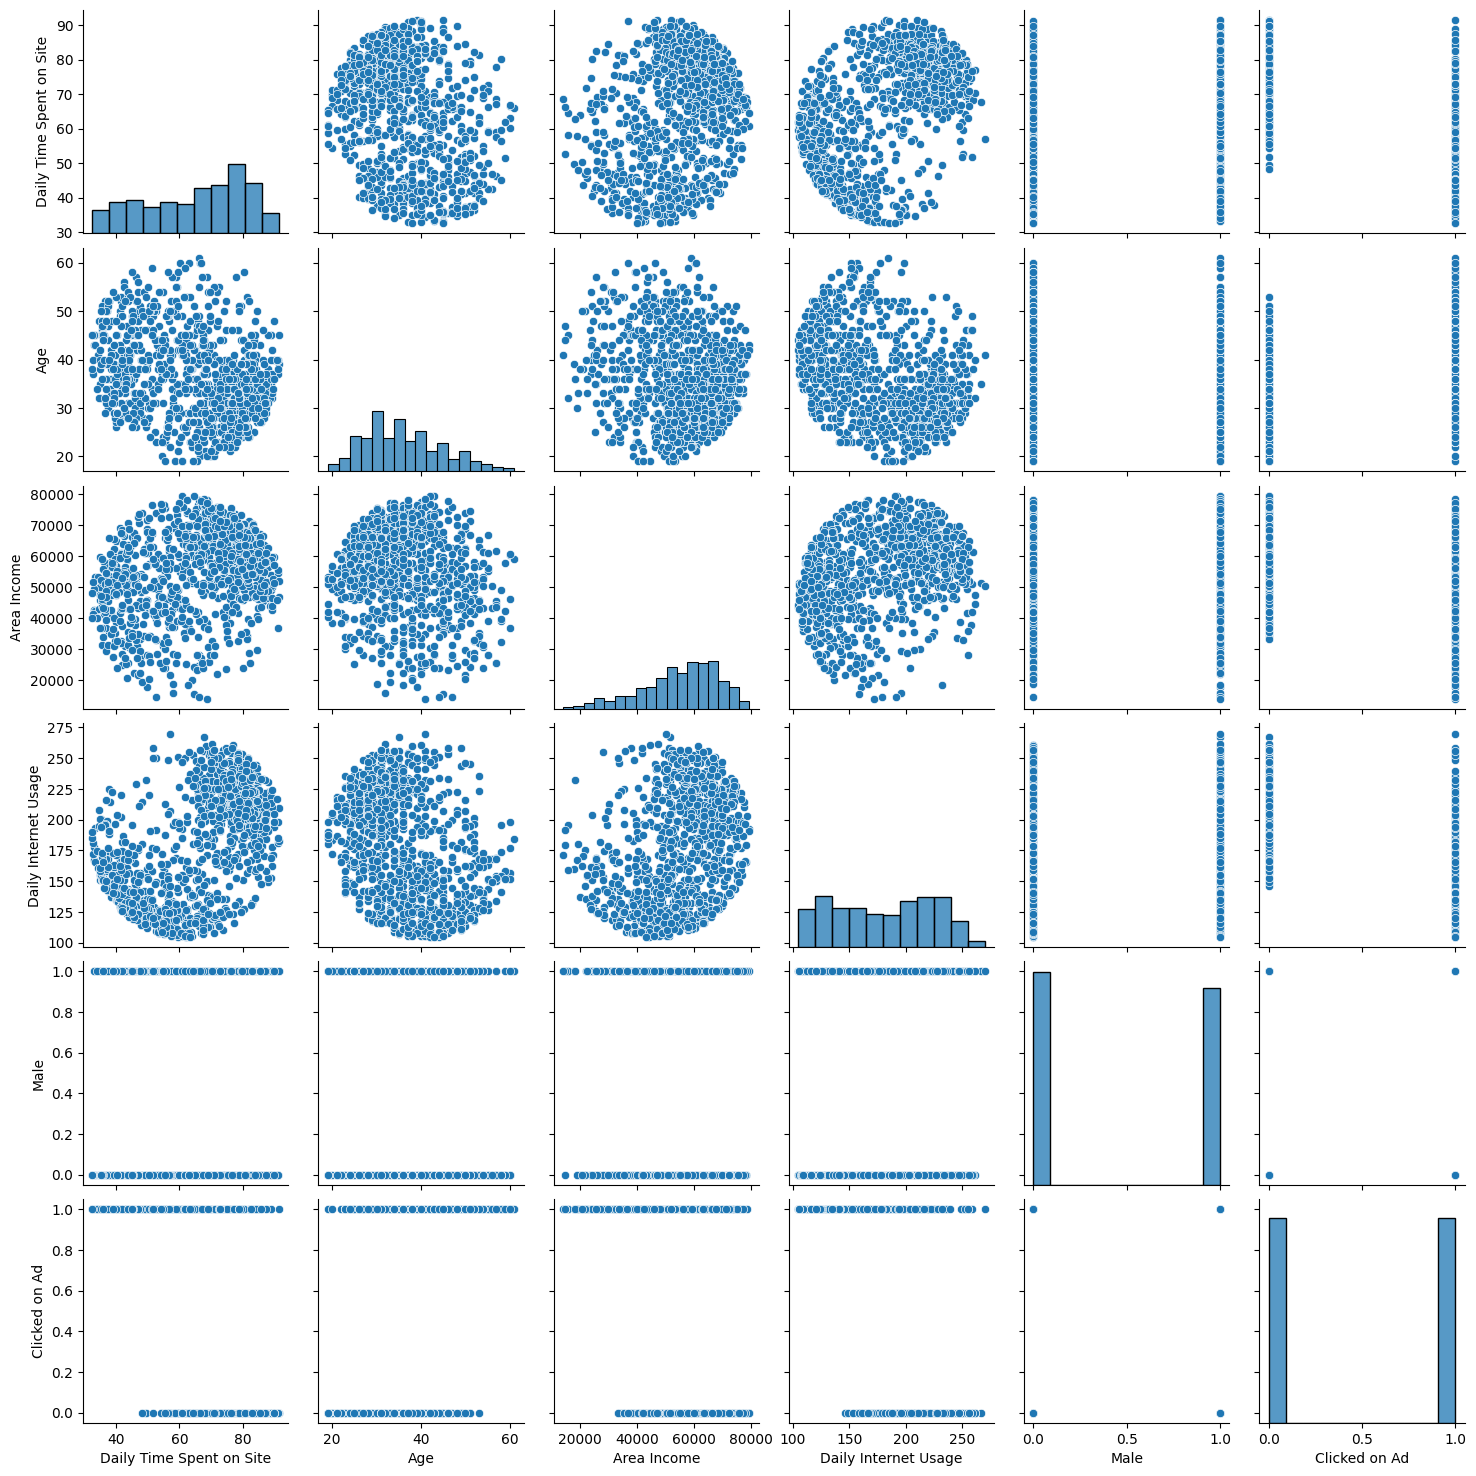

In [5]:
sns.pairplot(data= df)

## Num of clicking on adds vs Gender

<Axes: xlabel='Clicked on Ad', ylabel='count'>

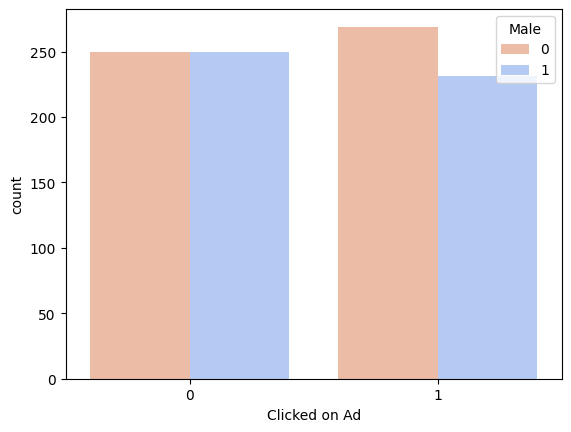

In [6]:
sns.countplot(data= df, x= 'Clicked on Ad', hue= 'Male', palette= 'coolwarm_r')

## Country vs Clicks

In [7]:
import plotly.express as px

In [8]:
counts = df['Country'].value_counts().reset_index()
counts.columns = ['Country', 'Count']
fig = px.choropleth(counts, locations='Country', locationmode='country names',
                    color='Count', hover_name='Country',
                    title='Country Counts Choropleth', color_continuous_scale='Viridis_r')
fig.show(renderer='iframe_connected')

In [9]:
import pandas as pd
import plotly.express as px

# 1) Aggregate counts by Country and clicked_on_ad
df_counts = (
    df
    .groupby(['Country', 'Clicked on Ad'])
    .size()
    .reset_index(name='Count')
)

# 2) Faceted choropleth
fig = px.choropleth(
    df_counts,
    locations='Country',
    locationmode='country names',
    color='Count',
    facet_col='Clicked on Ad',              # small multiples by ad-click status
    color_continuous_scale='RdBu_r',
    hover_name='Country',
    title='Country Counts by Ad Click Status'
)
fig.show(renderer='iframe_connected')


In [10]:
# 1) Count clicks and non‑clicks per country
df_counts = (
    df
    .groupby(['Country', 'Clicked on Ad'])     # group by country & click flag
    .size()                                    # count rows
    .reset_index(name='Count')                 # rename count column
)
# 2) Pivot so we have two columns: clicks and non‑clicks
df_pivot = df_counts.pivot(
    index='Country',
    columns='Clicked on Ad',
    values='Count',
).fillna(0).reset_index()

df_pivot.columns = ['Country', 'Not_Clicked', 'Clicked']

# 3) Compute ratio = Clicked / (Clicked + Not_Clicked)
df_pivot['Ratio'] = df_pivot['Clicked'] / (df_pivot['Clicked'] + df_pivot['Not_Clicked'])


In [11]:
fig = px.choropleth(
    df_pivot,
    locations='Country',
    locationmode='country names',
    color='Ratio',                           # color by click‑through ratio
    hover_name='Country',
    hover_data={'Ratio': ':.2%',            # show Ratio as percentage
                'Clicked': True,
                'Not_Clicked': True},
    title='Click‑Through Ratio by Country',
    color_continuous_scale='RdPu',       # choose any built‑in scale
    range_color=(0, 1)                      # fix color range to [0,1]
)
fig.update_layout(
    coloraxis_colorbar=dict(
        title='CTR',
        tickformat='.0%',                   # show ticks as percentages
    )
)
fig.show(renderer='iframe_connected')

## Age vs Income

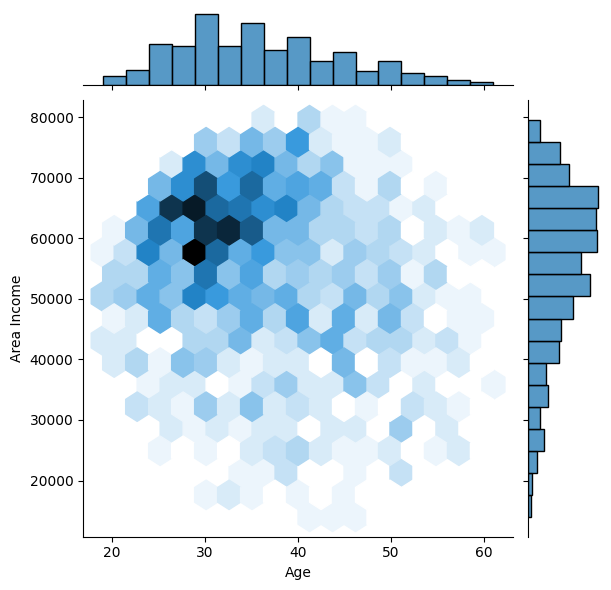

In [12]:
sns.jointplot(data= df, x= 'Age', y= 'Area Income', kind= 'hex')

## Daily Time spent on site vs. Age

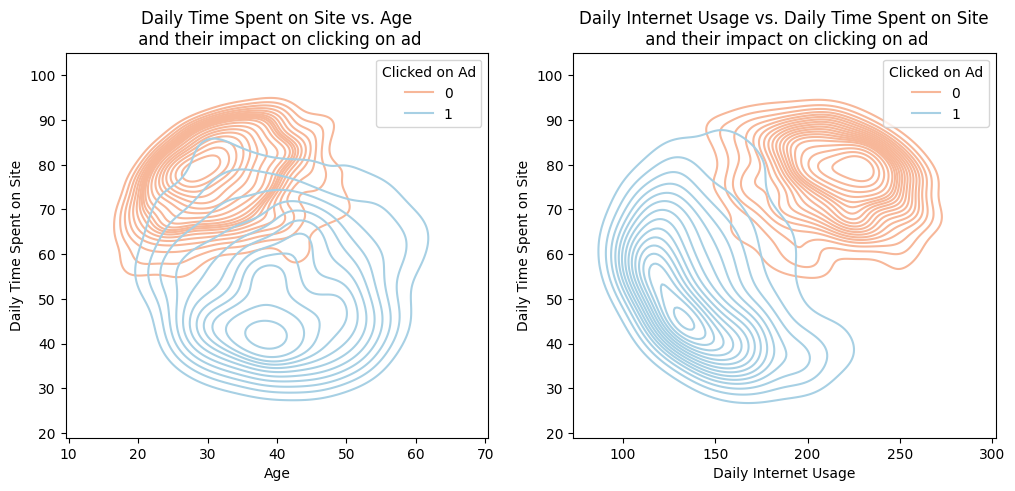

In [13]:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 5))

sns.kdeplot(data= df, y= 'Daily Time Spent on Site', x= 'Age', hue= 'Clicked on Ad', levels=20, palette= 'RdBu', ax= ax[0])
ax[0].set_title('Daily Time Spent on Site vs. Age\n and their impact on clicking on ad')

sns.kdeplot(data= df, x= 'Daily Internet Usage', y= 'Daily Time Spent on Site', hue= 'Clicked on Ad', levels=20, palette= 'RdBu', ax= ax[1])
ax[1].set_title('Daily Internet Usage vs. Daily Time Spent on Site\n and their impact on clicking on ad')

plt.show()

# Logistic Model for Perdictiong Clicking an Ads

In [14]:
X= df.drop(columns= ['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'])
y= df['Clicked on Ad']

In [15]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [16]:
x_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 101)

In [17]:
model= LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

######### Coefs #########
Daily Time Spent on Site: -0.17741895047214576
Age: 0.1410464197283764
Area Income: -0.00012315582682286152
Daily Internet Usage: -0.05991626607212468
Male: -0.46582282347407294

######### Model Evaluation #########


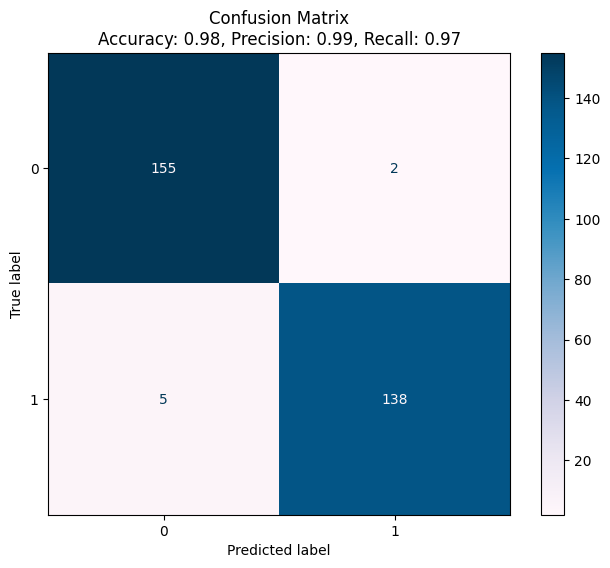

In [18]:
y_pred= model.predict(X_test)

print('######### Coefs #########')
for i, column in enumerate(X.columns):
    print(f"{column}: {model.coef_[0,i]}")

print()
print('######### Model Evaluation #########')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

class_names = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='PuBu', values_format='d')
ax.set_title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
plt.show()

# Conclusion

In logistic regression, each coefficient represents the change in the log-odds of the outcome for a one-unit increase in the predictor variable, holding all other variables constant. Exponentiating these coefficients gives odds ratios, which we can interpret as percentage changes in odds.

### 1. Daily Time Spent on Site
- Coefficient: −0.1774  
- Odds Ratio: exp(−0.1774) ≈ 0.837  
- Interpretation: Each additional minute spent on the site decreases the odds of clicking on an ad by approximately **16.3%**, assuming other variables remain constant.

### 2. Age
- Coefficient: 0.1410  
- Odds Ratio: exp(0.1410) ≈ 1.151  
- Interpretation: Each additional year of age increases the odds of clicking on an ad by about **15.1%**, holding other factors constant.

### 3. Area Income
- Coefficient: −0.0001232  
- Odds Ratio: exp(−0.0001232) ≈ 0.99988  
- Interpretation: Each additional dollar in area income slightly decreases the odds of clicking on an ad by approximately **0.012%**, assuming other variables are held constant.

### 4. Daily Internet Usage
- Coefficient: −0.0599  
- Odds Ratio: exp(−0.0599) ≈ 0.942  
- Interpretation: Each additional minute of daily internet usage decreases the odds of clicking on an ad by about **5.8%**, all else being equal.

### 5. Male
- Coefficient: −0.4658  
- Odds Ratio: exp(−0.4658) ≈ 0.627  
- Interpretation: Being male decreases the odds of clicking on an ad by approximately **37.3%** compared to being female, controlling for other variables.